In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


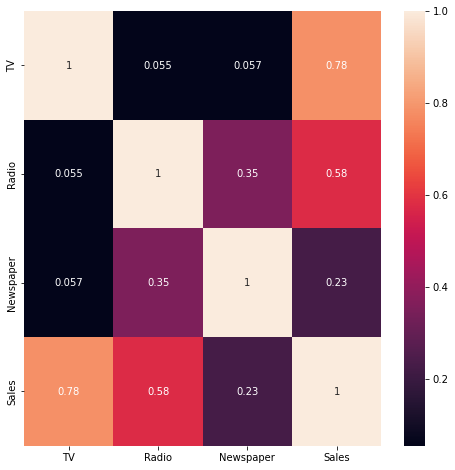

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [6]:
df.shape

(200, 4)

In [7]:
abs(df.corr()['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
x=df[['TV','Radio','Newspaper']]

y=df[['Sales']]

In [14]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [50]:
x_train.shape,x_test.shape 

((160, 3), (40, 3))

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr=LinearRegression()

In [53]:
model=lr.fit(x_train,y_train)

In [54]:
tahmin=model.predict(x_test)

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
(mean_squared_error(tahmin,y_test))**0.5

1.7815996615334502

In [57]:
r2_score(tahmin,y_test)

0.8791069137120033

<AxesSubplot:xlabel='TV', ylabel='Sales'>

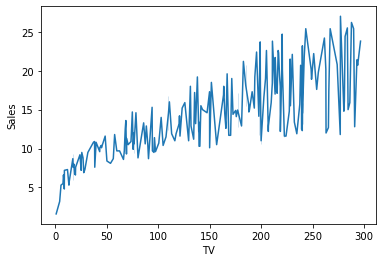

In [58]:
sns.lineplot(x="TV", y="Sales",data=df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

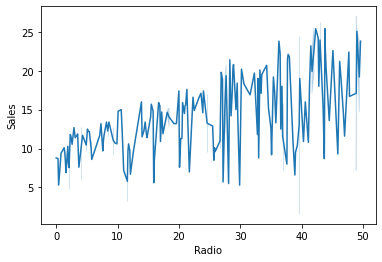

In [59]:
sns.lineplot(data=df,x="Radio", y="Sales")

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

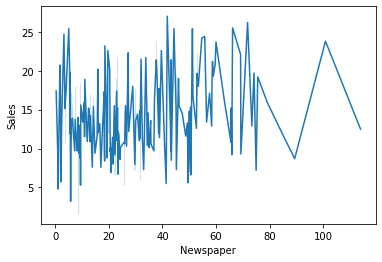

In [60]:
sns.lineplot(data=df,x="Newspaper", y="Sales")

In [61]:
#Test olarak ayırdığınız veri ile tahmin ettiğiniz veriyi aynı grafikte line chart ile görselleştireceksiniz.

In [82]:
y_test

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7
115,12.6
69,22.3
170,8.4
174,11.5
45,14.9


In [84]:
y_test.reset_index(drop = True, inplace = True)

In [85]:
y_test

,Sales
0,16.9
1,22.4
2,21.4
3,7.3
4,24.7
5,12.6
6,22.3
7,8.4
8,11.5
9,14.9


In [63]:
tahmin_df=pd.DataFrame(tahmin)

In [81]:
tahmin_df

,0
0,16.408024
1,20.889882
2,21.553843
3,10.608503
4,22.112373
5,13.105592
6,21.057192
7,7.461010
8,13.606346
9,15.155070


In [95]:
table = pd.concat([y_test,tahmin_df],axis=1)

In [96]:
table.columns =['Test', 'Predict']

In [97]:
table.shape

(40, 2)

In [98]:
table

,Test,Predict
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070


<AxesSubplot:>

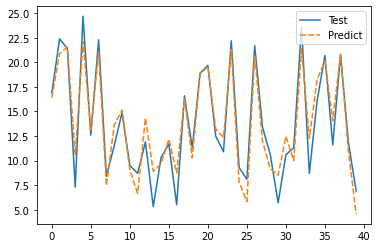

In [99]:
sns.lineplot(data=table)